In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [12]:
RAW_DIR=Path("artifact/raw")
train_ds=pd.read_csv(f"{RAW_DIR}/train.csv").sort_values(['time','row','col']).reset_index(drop=True)
train_ds.head()


,time,row,col,demand
0,0,0,0,0
1,0,0,1,0
2,0,0,2,5
3,0,0,7,33
4,0,1,3,19


In [13]:
train_ds['hour_of_day']=train_ds['time']%24
train_ds['day']=train_ds['time']//24

train_ds.head()

,time,row,col,demand,hour_of_day,day
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,2,5,0,0
3,0,0,7,33,0,0
4,0,1,3,19,0,0


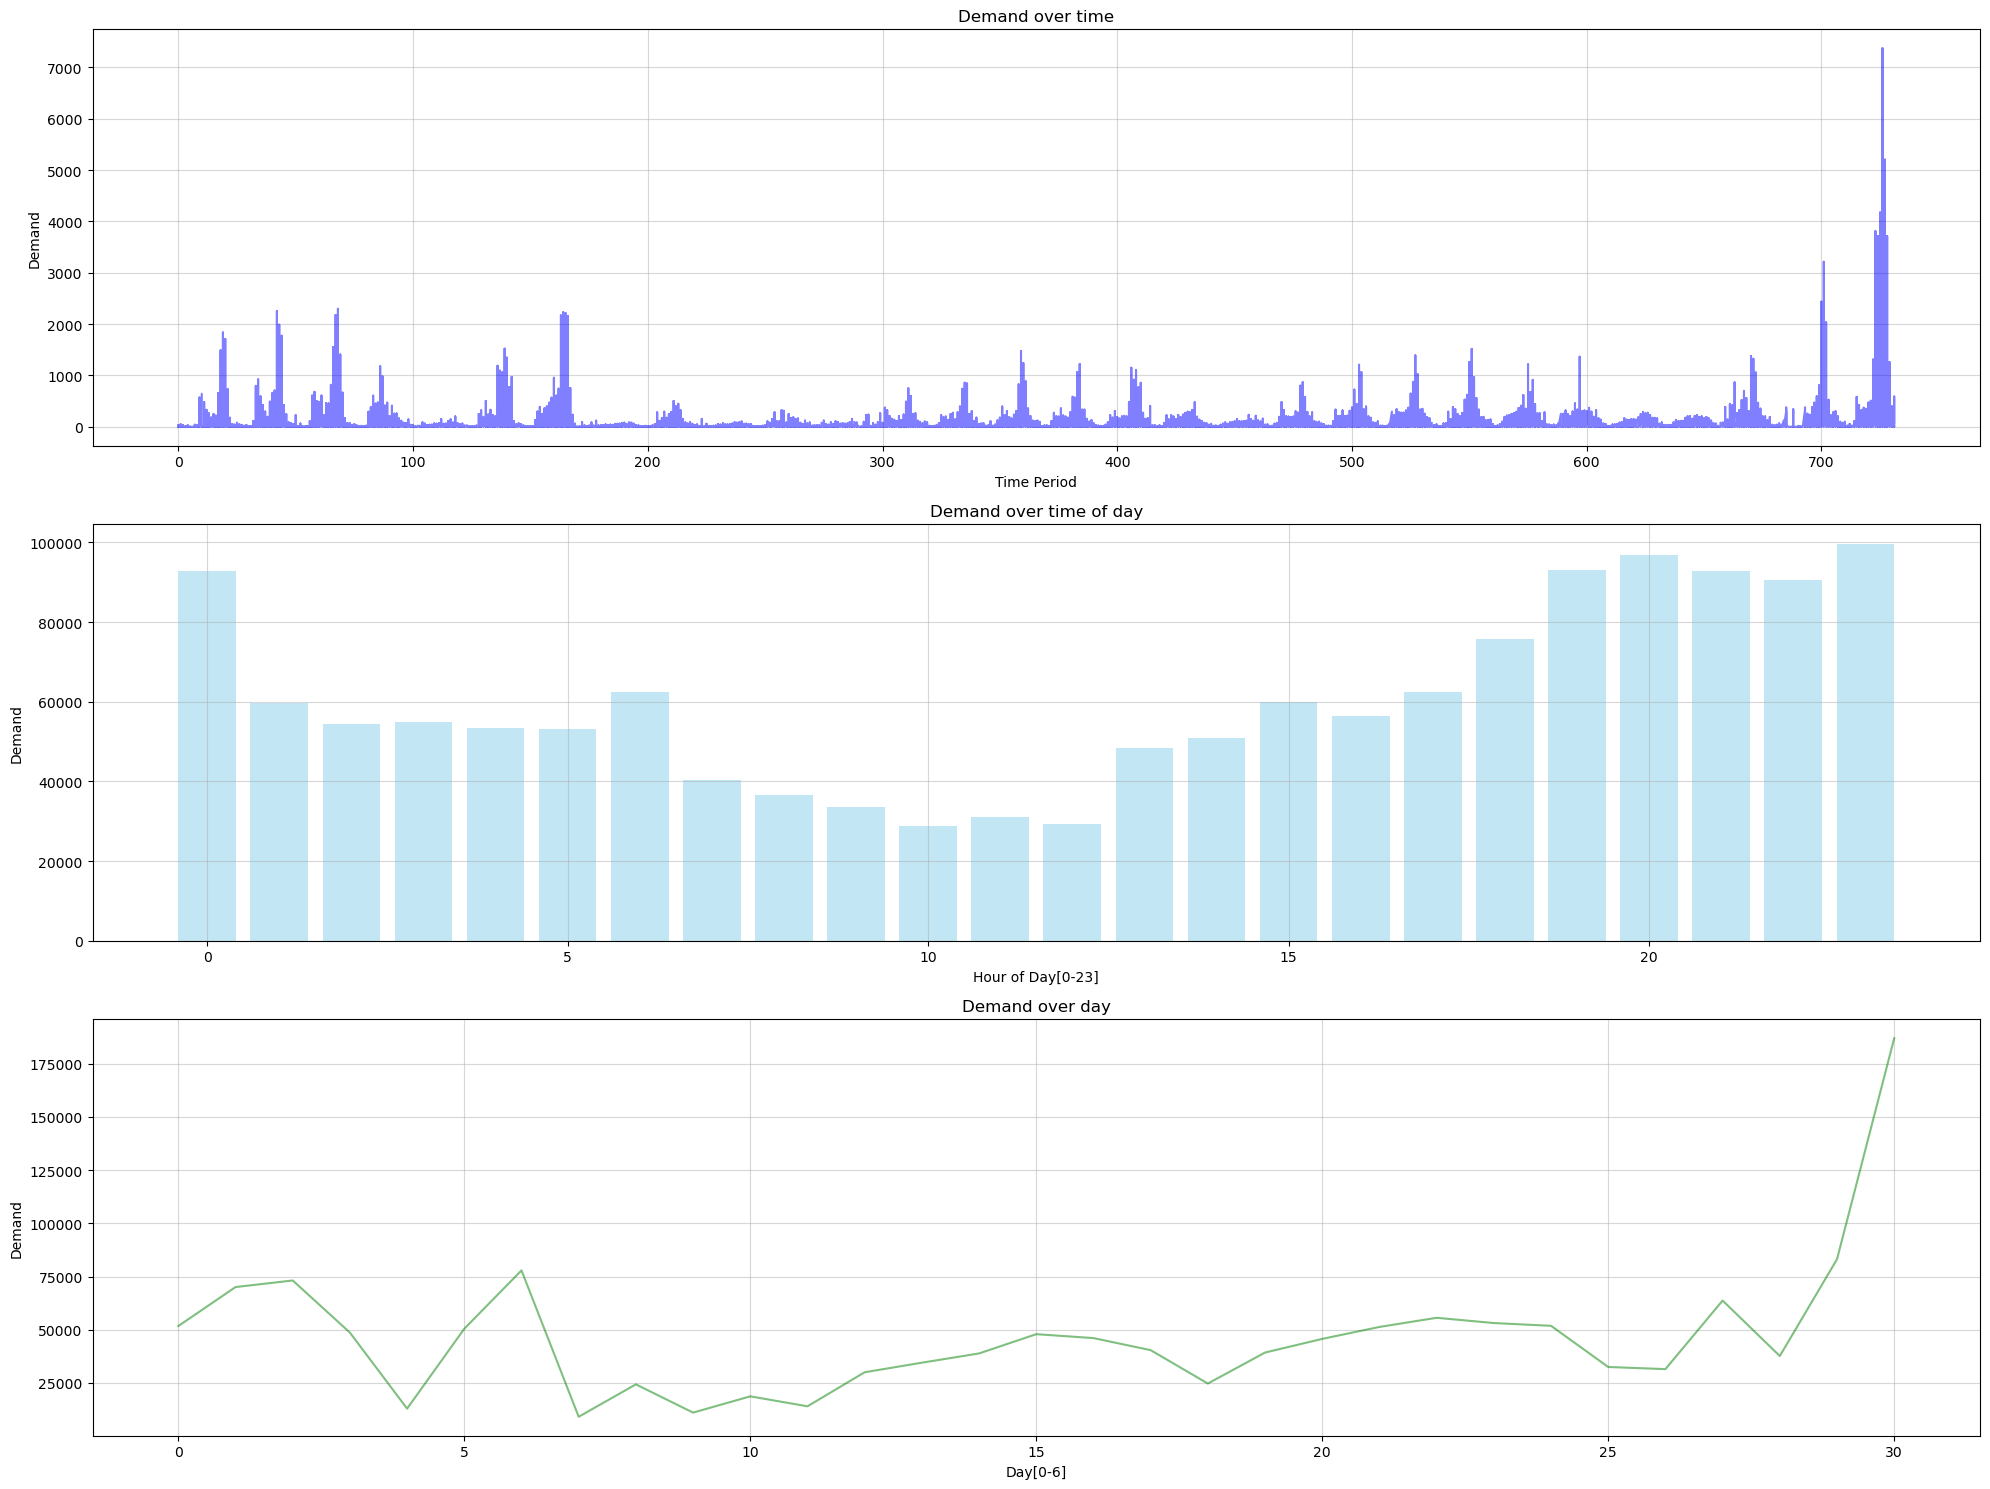

In [26]:
fix,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,15))

# Plotting the demand over time
ax1.plot(train_ds['time'],train_ds['demand'],'b',alpha=0.5)
ax1.set_title('Demand over time')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Demand')
ax1.grid(True,alpha=0.5)

# Plotting the demand over time of day
hourly_demand=train_ds.groupby('hour_of_day')['demand'].sum()
ax2.bar(hourly_demand.index,hourly_demand.values,color='skyblue',alpha=0.5)
ax2.set_title('Demand over time of day')
ax2.set_xlabel('Hour of Day[0-23]') 
ax2.set_ylabel('Demand')
ax2.grid(True,alpha=0.5)

# Plotting the demand over day
daily_demand=train_ds.groupby('day')['demand'].sum()
ax3.plot(daily_demand.index,daily_demand.values,color='green',alpha=0.5)
ax3.set_title('Demand over day')
ax3.set_xlabel('Day[0-6]')
ax3.set_ylabel('Demand')
ax3.grid(True,alpha=0.5)

plt.tight_layout()

Best shift: 18


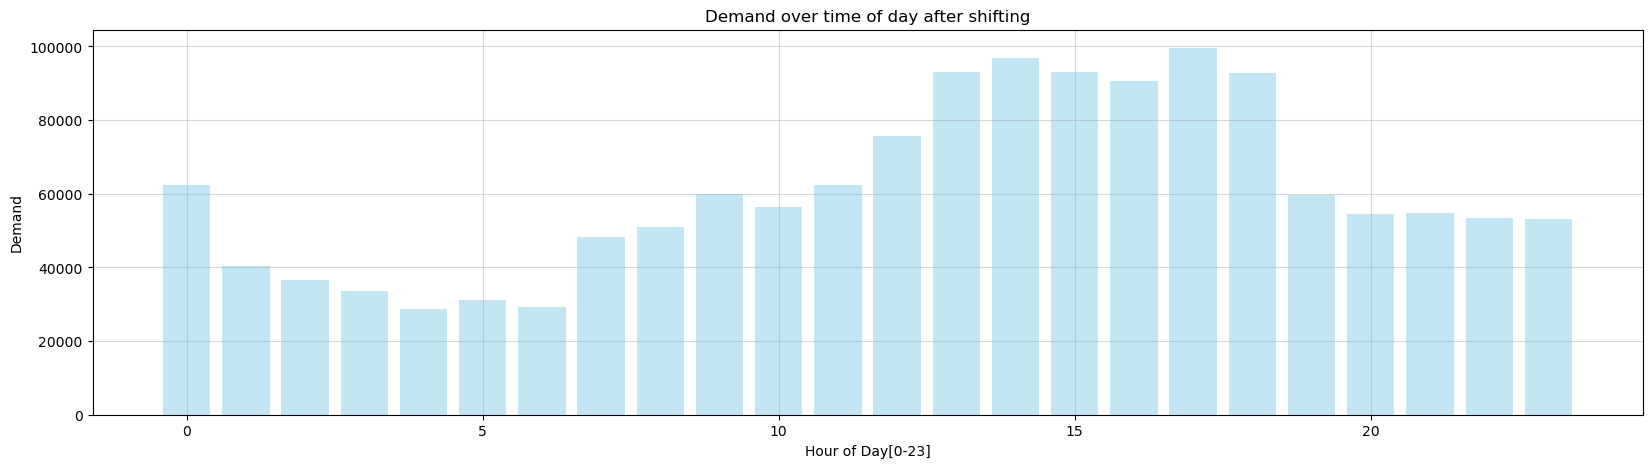

In [28]:
shift=range(24)
best_shift=0
best_variance=float('-inf')
df_sorted=train_ds.sort_values(['time']).reset_index(drop=True)

# Finding the best shift
for s in shift:
    df_temp=df_sorted.copy()
    df_temp['hour_of_day']=(df_temp['hour_of_day']+s)%24
    peak_time = df_temp[df_temp['hour_of_day'].isin([17,18])]['demand'].sum()
    off_peak_time =df_temp[df_temp['hour_of_day'].isin([3,4])]['demand'].sum()
    variance=peak_time-off_peak_time
    if variance>best_variance:
        best_variance=variance
        best_shift=s


df_sorted['hour_of_day']=(df_sorted['time']+best_shift)%24
df_sorted['day']=df_sorted['time']//24
print(f"Best shift: {best_shift}")

hourly_demand=df_sorted.groupby('hour_of_day')['demand'].sum()
plt.figure(figsize=(20,5))
plt.bar(hourly_demand.index,hourly_demand.values,color='skyblue',alpha=0.5)
plt.title('Demand over time of day after shifting')
plt.xlabel('Hour of Day[0-23]')
plt.ylabel('Demand')
plt.grid(True,alpha=0.5)
plt.show()
